# -Imports-

In [1]:
import pandas as pd
import csv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from tabulate import tabulate

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head() # example display of the dataset being used

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Continuous Variables
    Ejection Fraction (%)
    Creatinine Phosphokinase Level (U/L)

### Binary Variables
    High Blood Pressure (1/0)

# -Data Preparation-

In [4]:
# DATA PREPARATION

# check for null
df.isnull().values.any() # No null values

False

In [5]:
# age - sanity check
df.loc[df['age'] > 100]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [6]:
# check binary variables

df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']].apply(pd.Series.value_counts)

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,170,174,194,105,203,203
1,129,125,105,194,96,96


In [7]:
# Count HBP vs nHBP
df["high_blood_pressure"].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

n for HBP = 104


n for nHBP = 188

# -Data Exploration-

##     Ejection Fraction

|        |   HBP |   Non-HBP |
|--------+-------+-----------|
| Min    |    17 |        14 |
| Max    |    70 |        80 |
| Median |    38 |        38 |
| Q1     |    30 |        30 |
| Q3     |    45 |        40 |
| IQR    |    15 |        10 |


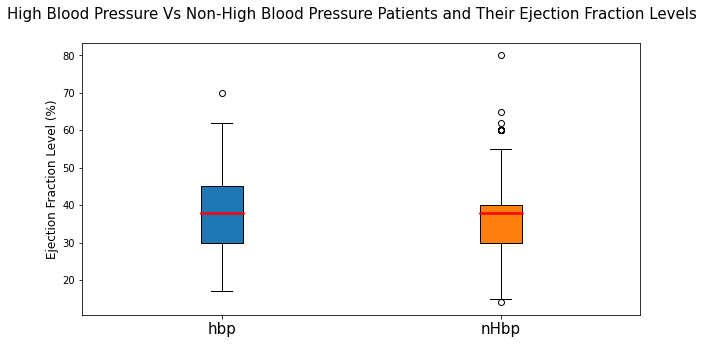

In [8]:
# EJECTION FRACTION - Boxplot

hbp = df.loc[df['high_blood_pressure'] == 1]['ejection_fraction']
nHbp = df[df['high_blood_pressure'] == 0]['ejection_fraction']
data = {'hbp': hbp, 'nHbp': nHbp}

fig, ax = plt.subplots(1, 1, figsize=(10,5))
bplot = ax.boxplot(data.values(), patch_artist=True, medianprops=dict(color='red', linewidth=2.5))
ax.set_xticklabels(data.keys(), fontsize=15)

plt.ylabel("Ejection Fraction Level (%)", fontsize=12)

fig.suptitle("High Blood Pressure Vs Non-High Blood Pressure Patients and Their Ejection Fraction Levels", fontsize=15)


# Colors
colors = ['#1f77b4', '#ff7f0e']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

table = [
    ["Min", hbp.min(), nHbp.min()],
    ["Max", hbp.max(), nHbp.max()],
    ["Median", hbp.median(), nHbp.median()],
    ["Q1", hbp.quantile(0.25), nHbp.quantile(0.25)],
    ["Q3", hbp.quantile(0.75), nHbp.quantile(0.75)],
    ["IQR", hbp.quantile(0.75)-hbp.quantile(0.25), nHbp.quantile(0.75)-nHbp.quantile(0.25)],
]

print(tabulate(table, headers=[" ", "HBP", "Non-HBP"], tablefmt='orgtbl'))


|        |   HBP |   Non-HBP |
|--------+-------+-----------|
| Min    |    17 |        14 |
| Max    |    70 |        80 |
| Median |    38 |        38 |
| Q1     |    30 |        30 |
| Q3     |    45 |        40 |
| IQR    |    15 |        10 |


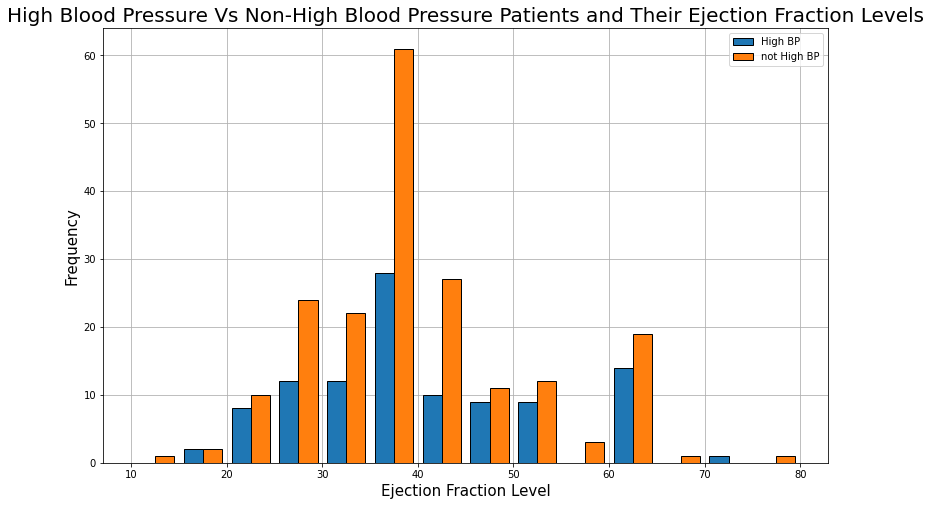

In [9]:
# EJECTION FRACTION - Histogram

hbp = df.loc[df['high_blood_pressure'] == 1]['ejection_fraction']
nHbp = df[df['high_blood_pressure'] == 0]['ejection_fraction']
data = {'hbp': hbp, 'nHbp': nHbp}

fig, ax = plt.subplots(1, 1, figsize=(13,8))

ax.grid()
ax.hist([hbp, nHbp], bins=range(10,85,5), label=['High BP','not High BP'], edgecolor="black")
ax.legend(loc='upper right')
plt.xlabel("Ejection Fraction Level", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
ax.set_axisbelow(True)
                 
plt.title("High Blood Pressure Vs Non-High Blood Pressure Patients and Their Ejection Fraction Levels", fontsize=20)

table = [
    ["Min", hbp.min(), nHbp.min()],
    ["Max", hbp.max(), nHbp.max()],
    ["Median", hbp.median(), nHbp.median()],
    ["Q1", hbp.quantile(0.25), nHbp.quantile(0.25)],
    ["Q3", hbp.quantile(0.75), nHbp.quantile(0.75)],
    ["IQR", hbp.quantile(0.75)-hbp.quantile(0.25), nHbp.quantile(0.75)-nHbp.quantile(0.25)],
]

print(tabulate(table, headers=[" ", "HBP", "Non-HBP"], tablefmt='orgtbl'))


Text(0.5, 1.0, 'High Blood Pressure and Their Ejection Fraction Levels')

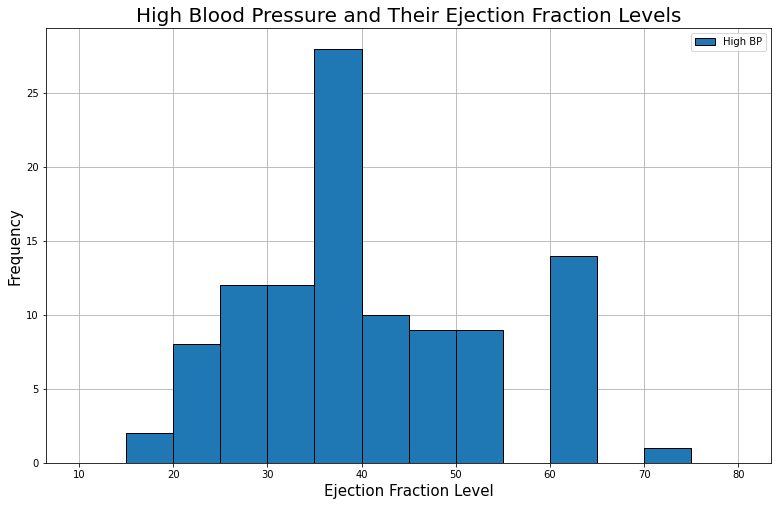

In [10]:
# EJECTION FRACTION - Histogram

hbp = df.loc[df['high_blood_pressure'] == 1]['ejection_fraction']
nHbp = df[df['high_blood_pressure'] == 0]['ejection_fraction']
data = {'hbp': hbp, 'nHbp': nHbp}

fig, ax = plt.subplots(1, 1, figsize=(13,8))

ax.grid()
ax.hist([hbp], bins=range(10,85,5), label=['High BP'], edgecolor="black")
ax.legend(loc='upper right')
plt.xlabel("Ejection Fraction Level", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
ax.set_axisbelow(True)
                 
plt.title("High Blood Pressure and Their Ejection Fraction Levels", fontsize=20)



Text(0.5, 1.0, 'Non-High Blood Pressure Patients and Their Ejection Fraction Levels')

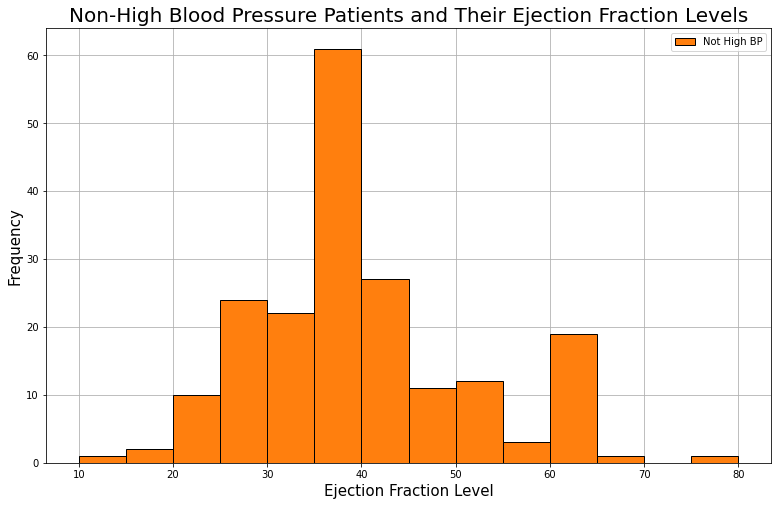

In [11]:
# EJECTION FRACTION - Histogram

hbp = df.loc[df['high_blood_pressure'] == 1]['ejection_fraction']
nHbp = df[df['high_blood_pressure'] == 0]['ejection_fraction']
data = {'hbp': hbp, 'nHbp': nHbp}

fig, ax = plt.subplots(1, 1, figsize=(13,8))

ax.grid()
ax.hist([nHbp], bins=range(10,85,5), label=['Not High BP'], edgecolor="black", color="#ff7f0e")
ax.legend(loc='upper right')
plt.xlabel("Ejection Fraction Level", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
ax.set_axisbelow(True)
                 
plt.title("Non-High Blood Pressure Patients and Their Ejection Fraction Levels", fontsize=20)



## Creatinine Phosphokinase

|        |   HBP |   Non-HBP |
|--------+-------+-----------|
| Min    |    30 |     23    |
| Max    |  7702 |   7861    |
| Median |   220 |    275.5  |
| Q1     |   113 |    123.75 |
| Q3     |   582 |    582    |
| IQR    |   469 |    458.25 |


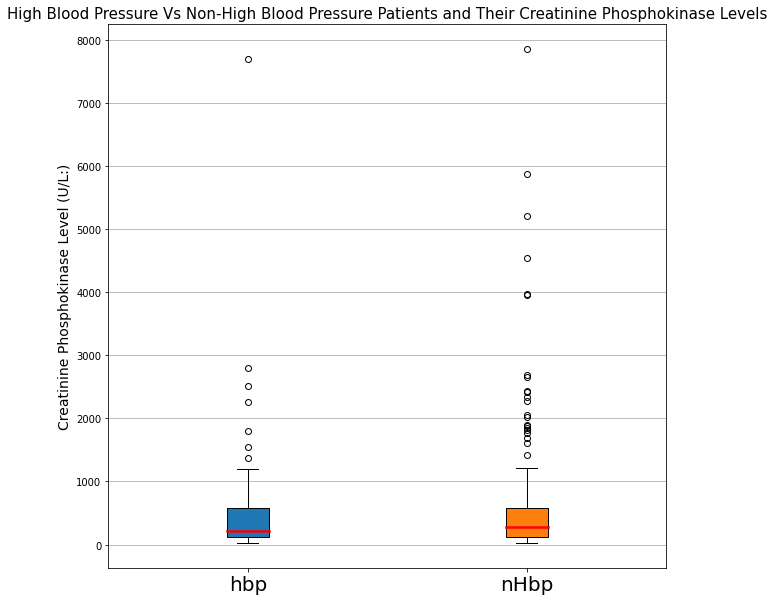

In [12]:
# CREATININE PHOSPHOKINASE - Boxplot

hbp = df.loc[df['high_blood_pressure'] == 1]['creatinine_phosphokinase']
nHbp = df[df['high_blood_pressure'] == 0]['creatinine_phosphokinase']
data = {'hbp': hbp, 'nHbp': nHbp}

fig, ax = plt.subplots(1, 1, figsize=(10,10))
bplot = ax.boxplot(data.values(), patch_artist=True, medianprops=dict(color='red', linewidth=2.5))
ax.set_xticklabels(data.keys(), fontsize=20)
ax.yaxis.grid(True)

plt.title("High Blood Pressure Vs Non-High Blood Pressure Patients and Their Creatinine Phosphokinase Levels", fontsize=15)
plt.ylabel("Creatinine Phosphokinase Level (U/L:)", fontsize=14)

# Colors
colors = ['#1f77b4', '#ff7f0e']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)



table = [
    ["Min", hbp.min(), nHbp.min()],
    ["Max", hbp.max(), nHbp.max()],
    ["Median", hbp.median(), nHbp.median()],
    ["Q1", hbp.quantile(0.25), nHbp.quantile(0.25)],
    ["Q3", hbp.quantile(0.75), nHbp.quantile(0.75)],
    ["IQR", hbp.quantile(0.75)-hbp.quantile(0.25), nHbp.quantile(0.75)-nHbp.quantile(0.25)],
]

print(tabulate(table, headers=[" ", "HBP", "Non-HBP"], tablefmt='orgtbl'))


***REMOVING ALL VALUES < 3000...***

In [13]:
df = df[df.creatinine_phosphokinase < 3000]

=== Executing: ===
# CREATININE PHOSPHOKINASE - Boxplot

hbp = df.loc[df['high_blood_pressure'] == 1]['creatinine_phosphokinase']
nHbp = df[df['high_blood_pressure'] == 0]['creatinine_phosphokinase']
data = {'hbp': hbp, 'nHbp': nHbp}

fig, ax = plt.subplots(1, 1, figsize=(10,10))
bplot = ax.boxplot(data.values(), patch_artist=True, medianprops=dict(color='red', linewidth=2.5))
ax.set_xticklabels(data.keys(), fontsize=20)
ax.yaxis.grid(True)

plt.title("High Blood Pressure Vs Non-High Blood Pressure Patients and Their Creatinine Phosphokinase Levels", fontsize=15)
plt.ylabel("Creatinine Phosphokinase Level (U/L:)", fontsize=14)

# Colors
colors = ['#1f77b4', '#ff7f0e']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)



table = [
    ["Min", hbp.min(), nHbp.min()],
    ["Max", hbp.max(), nHbp.max()],
    ["Median", hbp.median(), nHbp.median()],
    ["Q1", hbp.quantile(0.25), nHbp.quantile(0.25)],
    ["Q3", hbp.quantile(0.75), nHbp.quantile(0.75)],
   

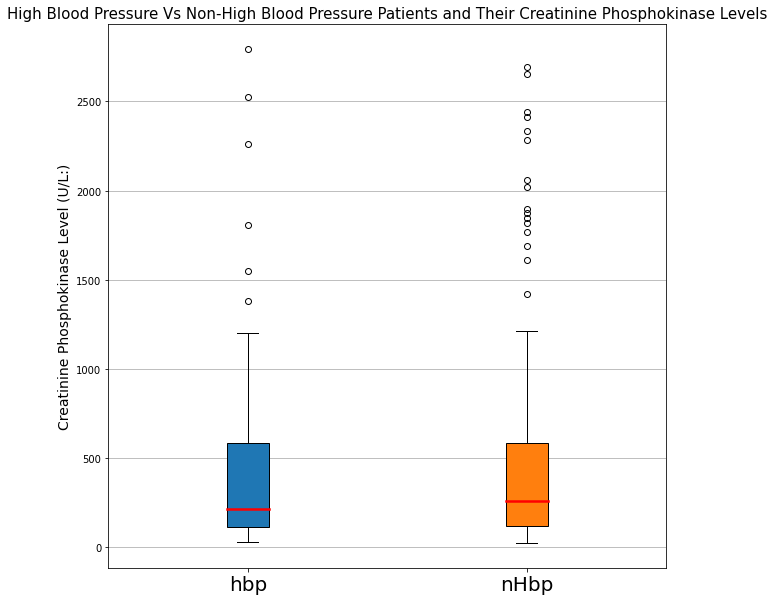

In [14]:
%rerun 12

|        |     HBP |   Non-HBP |
|--------+---------+-----------|
| Min    |   30    |     23    |
| Max    | 2794    |   2695    |
| Median |  216    |    257.5  |
| Q1     |  112.75 |    120.25 |
| Q3     |  582    |    582    |
| IQR    |  469.25 |    461.75 |


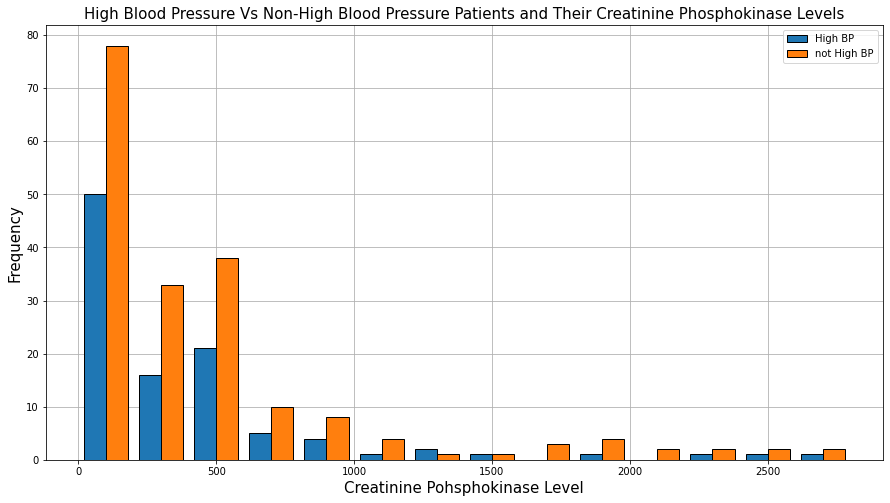

In [15]:
# CREATININE PHOSPHOKINASE - Histogram



fig, ax = plt.subplots(1, 1, figsize=(15,8))

ax.grid()
ax.hist([hbp, nHbp], bins=range(0,3000,200),label=['High BP','not High BP'], edgecolor="black")
ax.legend(loc='upper right')
plt.xlabel("Creatinine Pohsphokinase Level", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
ax.set_axisbelow(True)

plt.title("High Blood Pressure Vs Non-High Blood Pressure Patients and Their Creatinine Phosphokinase Levels", fontsize=15)

table = [
    ["Min", hbp.min(), nHbp.min()],
    ["Max", hbp.max(), nHbp.max()],
    ["Median", hbp.median(), nHbp.median()],
    ["Q1", hbp.quantile(0.25), nHbp.quantile(0.25)],
    ["Q3", hbp.quantile(0.75), nHbp.quantile(0.75)],
    ["IQR", hbp.quantile(0.75)-hbp.quantile(0.25), nHbp.quantile(0.75)-nHbp.quantile(0.25)],
]

print(tabulate(table, headers=[" ", "HBP", "Non-HBP"], tablefmt='orgtbl'))


|        |     HBP |
|--------+---------|
| Min    |   30    |
| Max    | 2794    |
| Median |  216    |
| Q1     |  112.75 |
| Q3     |  582    |
| IQR    |  469.25 |


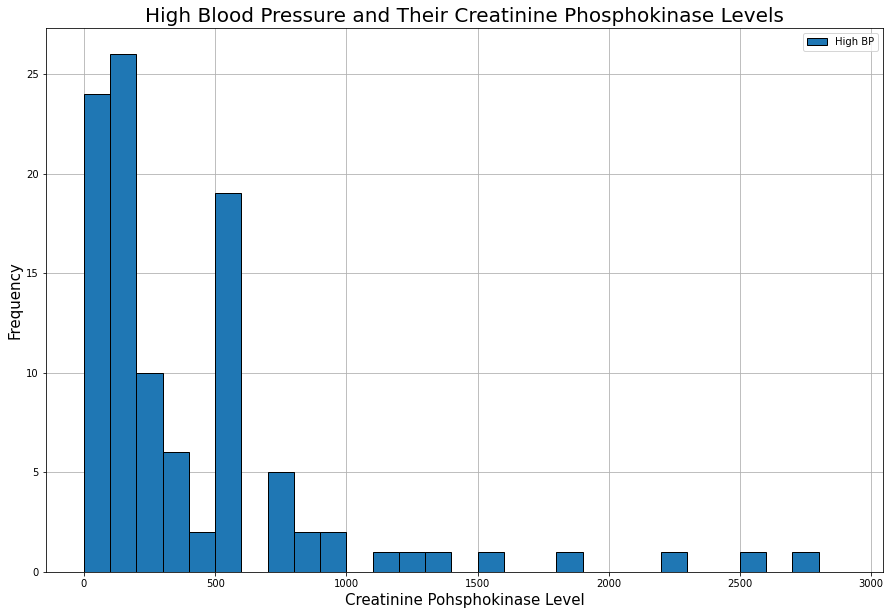

In [16]:
# CREATININE PHOSPHOKINASE - Histogram

fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.grid()
ax.hist([hbp], bins=range(0,3000,100),label=['High BP','not High BP'], edgecolor="black")
ax.legend(loc='upper right')
plt.xlabel("Creatinine Pohsphokinase Level", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
ax.set_axisbelow(True)

plt.title("High Blood Pressure and Their Creatinine Phosphokinase Levels", fontsize=20)

table = [
    ["Min", hbp.min()],
    ["Max", hbp.max()],
    ["Median", hbp.median()],
    ["Q1", hbp.quantile(0.25)],
    ["Q3", hbp.quantile(0.75)],
    ["IQR", hbp.quantile(0.75)-hbp.quantile(0.25)],
]

print(tabulate(table, headers=[" ", "HBP", "Non-HBP"], tablefmt='orgtbl'))

|        |     HBP |
|--------+---------|
| Min    |   23    |
| Max    | 2695    |
| Median |  257.5  |
| Q1     |  120.25 |
| Q3     |  582    |
| IQR    |  461.75 |


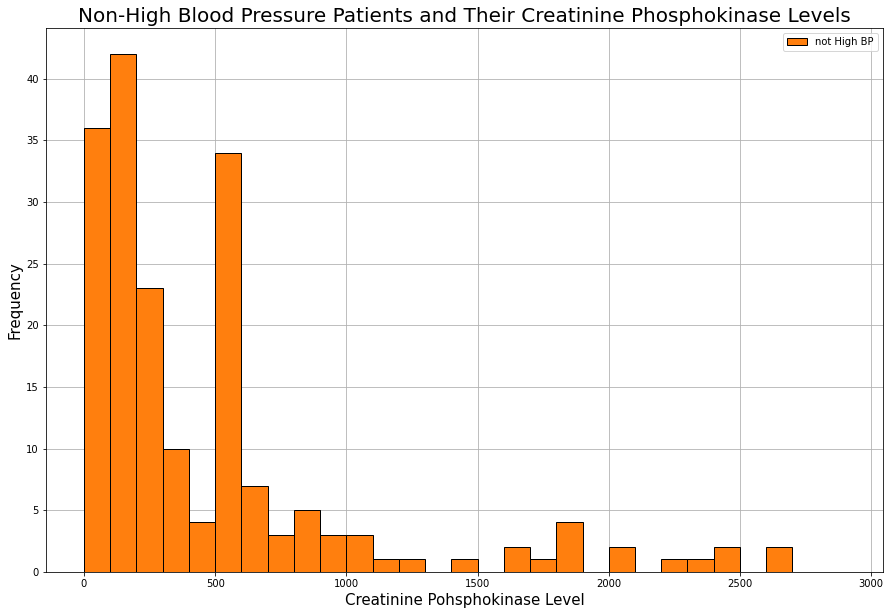

In [17]:
# CREATININE PHOSPHOKINASE - Histogram

fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.grid()
ax.hist([nHbp], bins=range(0,3000,100),label=['not High BP'], edgecolor="black", color="#ff7f0e")
ax.legend(loc='upper right')
plt.xlabel("Creatinine Pohsphokinase Level", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
ax.set_axisbelow(True)

plt.title("Non-High Blood Pressure Patients and Their Creatinine Phosphokinase Levels", fontsize=20)

table = [
    ["Min", nHbp.min()],
    ["Max", nHbp.max()],
    ["Median", nHbp.median()],
    ["Q1", nHbp.quantile(0.25)],
    ["Q3", nHbp.quantile(0.75)],
    ["IQR", nHbp.quantile(0.75)-nHbp.quantile(0.25)],
]

print(tabulate(table, headers=[" ", "HBP", "Non-HBP"], tablefmt='orgtbl'))

## Ejection Fraction and Creatinine Phosphokinase

Text(0.5, 1.0, 'Ejection Fraction vs Creatinine Phosphokinase')

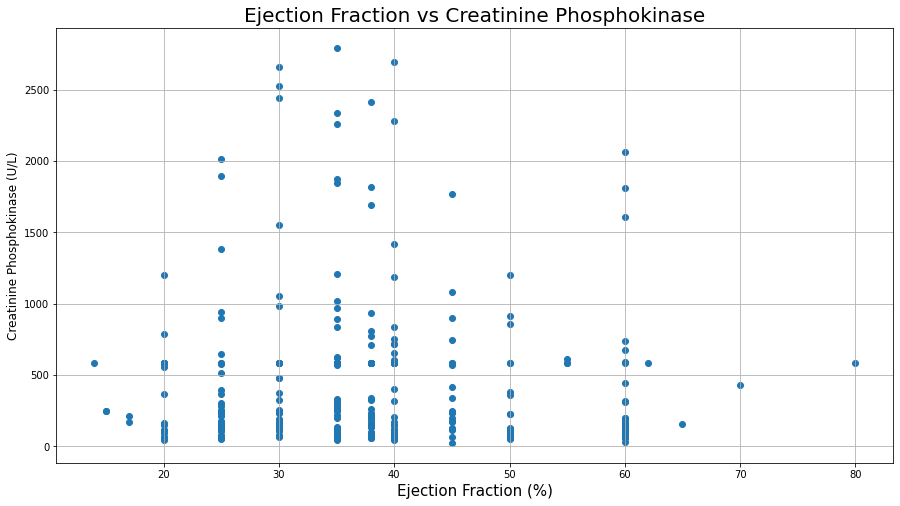

In [18]:
plt.figure(figsize=(15,8))

plt.scatter(df['ejection_fraction'], df['creatinine_phosphokinase'])

plt.grid()
plt.rc('axes', axisbelow=True)
plt.xlabel("Ejection fraction")
plt.ylabel("Creatinine Phosphokinase")

plt.xlabel("Ejection Fraction (%)", fontsize=15)
plt.ylabel("Creatinine Phosphokinase (U/L)", fontsize=12)
plt.title("Ejection Fraction vs Creatinine Phosphokinase", fontsize=20)

In [19]:
df['ejection_fraction'].value_counts()

35    47
38    39
40    36
25    35
30    33
60    31
50    21
45    20
20    18
55     3
17     2
15     2
65     1
70     1
14     1
62     1
80     1
Name: ejection_fraction, dtype: int64